v7
17 AUG 2018 
1. Skew Removed
2.Feature Exploration - Application data (to be started)
3. nans not removed

References
[Link1](http://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation)
[Link2](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)
[Link3](https://towardsdatascience.com/a-complete-machine-learning-project-walk-through-in-python-part-two-300f1f8147e2)
https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

#https://lightgbm.readthedocs.io/en/latest/Parameters.html0
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
https://www.kaggle.com/eikedehling/tune-and-compare-xgb-lightgbm-rf-with-hyperopt
https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics/notebook



## Functions

diving train and test data

In [ ]:
def divide_data(train,test):
    
    print("Dividing data into numerical and categorical")
    print("Train and Test Shape Before:  ", train.shape , test.shape)
    # separating object and non object data
    object_list=[]
    not_object_list=[]
    for num in train.columns:
        if (train[num].dtype=='object'):
            object_list.append(num)
        else:
            not_object_list.append(num)
    train_num=train[not_object_list]
    not_object_list.remove('TARGET')
    test_num=test[not_object_list]
    train_cat=train[object_list]
    test_cat=test[object_list]
    print("Train(Numerical) and Test(Numerical) Shape After:  ", train_num.shape , test_num.shape)
    print("Train(Categorical) and Test(Categorical) Shape After:  ", train_cat.shape , test_cat.shape)
    
    return(train_num,test_num,train_cat,test_cat)

Adding integers to categorical data

In [ ]:
def add_int_to_cat(train_num,train_cat,test_num,test_cat):
    #Diving object data into float and int and adding int columns <10 to categorical data 
    print("\nBreaking numerical features into float and int, and atting integers in categorical")
    num_list=[]
    cat_list=[]
    for col in train_num.columns:
        if (train_num[col].dtype == "int64") & (train_num[col].nunique() < unique_values) :
            cat_list.append(col)
        else:
            num_list.append(col)
    train_num_num=train_num[num_list]
    test_num_num=test_num[num_list]
    train_num_cat=train_num[cat_list]
    cat_list.remove('TARGET')
    test_num_cat=test_num[cat_list]

    print("Float - Train(Numerical) and Test(Numerical) Shape After:  ", train_num_num.shape , test_num_num.shape)
    print("Int - Train(Numerical) and Test(Numerical) Shape After:  ", train_num_cat.shape , test_num_cat.shape)

    train_num=train_num_num
    test_num=test_num_num
    train_cat= pd.concat([train_num_cat,train_cat], ignore_index=False, axis=1)
    test_cat= pd.concat([test_num_cat,test_cat], ignore_index=False, axis=1)

    print("Train(Numerical) and Test(Numerical) Shape:  ", train_num.shape , test_num.shape)
    print("Train(Categorical) and Test(Categorical) Shape:  ", train_cat.shape , test_cat.shape)
    
    return(train_num,test_num,train_cat,test_cat)

Removing Categorical Nans

In [ ]:
def remove_cat_nans(train_cat,test_cat):
    if nan_allow==True:
        print("\nRemoving columns from categorical Features with nan > ",nan_per,"%")
        #nan columns and value removal
        print("Total Nan Values : ", pd.isna(train_cat).sum().sum())
        print("Total Nan Values : ", pd.isna(test_cat).sum().sum())

        for col in train_cat.columns.values:
            if (pd.isna(train_cat[col]).sum())>0:
                if pd.isna(train_cat[col]).sum() > (nan_per/100*len(train_cat)):
                    #remove columns with nan values greater than 40%
                    print(col,"removed", pd.isna(train_cat[col]).sum())
                    train_cat=train_cat.drop([col], axis=1)
                    test_cat=test_cat.drop([col], axis=1)
                else:
                    #Fill nan values with mode
                    train_cat[col]=train_cat[col].fillna(train_cat[col].mode()[0])
                    test_cat[col]=test_cat[col].fillna(test_cat[col].mode()[0])
            else:
                #pass
                if(col!='TARGET'):
                    if(pd.isna(test_cat[col]).sum()>0):
                        test_cat[col]=test_cat[col].fillna(test_cat[col].mode()[0])

        print("Total Nan Values Left: ", pd.isna(train_cat).sum().sum())
        print("Total Nan Values Left: ", pd.isna(test_cat).sum().sum())

        print("Train(Categorical) and Test(Categorical) Shape After: ", train_cat.shape , test_cat.shape)
    else:
        print("\nNAN flag not set")
        
    return (train_cat, test_cat)

convert to dummy

In [ ]:
def convert_to_dummy(train_cat,test_cat):
    
    if dummy==True:
        print("\nConverting Categorical data to dummy")
        train_data = pd.concat([train_cat, test_cat], ignore_index=False, axis=0)   
        train_data=pd.get_dummies(train_data)
        train_cat=train_data.loc[train_cat.index.values]
        test_cat=train_data.loc[test_cat.index.values]
    else:
        print("\nConverting Categorical data to cat codes")
        for col in train_cat.columns.values:
            train_cat[col]=train_cat[col].astype('category').cat.codes
            if col!='TARGET':
                test_cat[col]=test_cat[col].astype('category').cat.codes

    print("Train(Categorical) and Test(Categorical) Shape After: ", train_cat.shape , test_cat.shape)
    return (train_cat,test_cat)

removing nans from numerical data

In [ ]:
def remove_num_nans(train_num,test_num):
    if nan_allow==True:
        #remove nans
        print("\nRemoving columns from numerical Features with nan > ",nan_per,"%")
        #nan columns and value removal
        print("Total Nan Values : ", pd.isna(train_num).sum().sum())
        print("Total Nan Values Left: ", pd.isna(test_num).sum().sum())

        for col in train_num.columns.values:
            if (pd.isna(train_num[col]).sum())>0:
                if pd.isna(train_num[col]).sum() > (nan_per/100*len(train_num)):
                    #remove columns with nan values greater than 40%
                    print(col,"removed", pd.isna(train_num[col]).sum())
                    train_num=train_num.drop([col], axis=1)
                    test_num=test_num.drop([col], axis=1)
                else:
                    #Fill nan values with mode
                    train_num[col]=train_num[col].fillna(train_num[col].median())
                    test_num[col]=test_num[col].fillna(test_num[col].median())
                    #train_num[col]=train_num[col].fillna(0)
                    #test_num[col]=test_num[col].fillna(0)
            else:
                pass
                if(col!='TARGET'):
                    if(pd.isna(test_num[col]).sum()>0):
                        test_num[col]=test_num[col].fillna(test_num[col].median())

        print("Total Nan Values Left: ", pd.isna(train_num).sum().sum())
        print("Total Nan Values Left: ", pd.isna(test_num).sum().sum())
        print("Train(Numerical) and Test(Numerical) Shape After: ", train_num.shape , test_num.shape)
    else:
        print("\nNAN flag not set")
        
    return(train_num,test_num)

Combining Preprocessed Data 

In [ ]:
def combine_data(train_num,test_num,train_cat,test_cat):
    
    if combine_datatypes==True:
        print("\nCombining Numerical and Categorical Data")
        X_train = pd.concat([train_num, train_cat], ignore_index=False, axis=1)   
        X_test = pd.concat([test_num, test_cat], ignore_index=False, axis=1)   
    if num_dtype==True:
        print("\nUsing Numerical Data Only")
        X_train=train_num
        X_test=test_num
    if cat_dtype==True:
        print("\nUsing Categorical Data )nly")
        X_train=train_cat
        X_test=test_cat
    print("Train and Test Shape After:  ", X_train.shape , X_test.shape)
    
    return(X_train,X_test)

## Conditions and Constants

In [2]:
nan_per=20
dummy=False
unique_values=5
combine_datatypes=True #if True, consider both numeric and categoric data
remove_outliers=True # if true,remove outliers from the data
cat_dtype=False # if True, consider catagoric data only
num_dtype=False # if True, consider numeric data only
nan_allow=True

## Imports

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
import seaborn as sns


## Reading Data

In [15]:
print(os.listdir("../input"))
application_train= pd.read_csv('../input/application_train.csv')
application_test= pd.read_csv('../input/application_test.csv')
#POS_CASH_balance= pd.read_csv('../input/POS_CASH_balance.csv')
bureau_balance= pd.read_csv('../input/bureau_balance.csv')
#previous_application= pd.read_csv('../input/previous_application.csv')
#installments_payments= pd.read_csv('../input/installments_payments.csv')
#credit_card_balance= pd.read_csv('../input/credit_card_balance.csv')
bureau= pd.read_csv('../input/bureau.csv')

application_train.set_index('SK_ID_CURR', inplace=True)
application_test.set_index('SK_ID_CURR', inplace=True)
target=application_train['TARGET']
print("Application Train Size and Test Size: ", application_train.shape,application_test.shape)
print("Percentage of Train Data: ",len(application_train)*100/(len(application_train)+len(application_test)))
print("Percentage of Test Data",len(application_test)*100/(len(application_train)+len(application_test)))
train=application_train
test=application_test

['POS_CASH_balance.csv', 'bureau_balance.csv', 'application_train.csv', 'previous_application.csv', 'installments_payments.csv', 'credit_card_balance.csv', 'sample_submission.csv', 'application_test.csv', 'bureau.csv']
Application Train Size and Test Size:  (307511, 121) (48744, 120)
Percentage of Train Data:  86.3176657169724
Percentage of Test Data 13.682334283027606


In [22]:
len(application_train.index)+len(application_test.index)

356255

In [32]:
print(len(bureau['SK_ID_BUREAU']))
len(bureau['SK_ID_CURR'].unique())


1716428


305811

In [59]:
#assign, target value 

bsid=bureau['SK_ID_CURR']
bureau['TARGET']=train['TARGET'][bsid].values


In [202]:
count=bureau['SK_ID_CURR'].value_counts()
idx=count.index.values
id_count=count

In [203]:
ca_count=pd.DataFrame(columns=['id','credit_active','credit_closed'])
ca_count['id']=idx

In [204]:
ca_count

,id,credit_active,credit_closed
0,120860,NaN,NaN
1,169704,NaN,NaN
2,318065,NaN,NaN
3,251643,NaN,NaN
4,425396,NaN,NaN
5,295809,NaN,NaN
6,129843,NaN,NaN
7,385133,NaN,NaN
8,177014,NaN,NaN
9,325354,NaN,NaN


In [ ]:
for i in idx:
    bid=bureau['SK_ID_BUREAU'][bureau['SK_ID_CURR']==i]
    bid=bureau['CREDIT_ACTIVE'][bureau['SK_ID_CURR']==i]
    print(bid.value_counts())
    print((bid=='Closed').sum())
    print((bid=='Active').sum())
    ca_count['credit_closed'][ca_count['id']==i]= (bid=='Closed').sum()
    ca_count['credit_active'][ca_count['id']==i]= (bid=='Active').sum()


Closed    108
Active      8
Name: CREDIT_ACTIVE, dtype: int64
108
8
Closed    84
Active    10
Name: CREDIT_ACTIVE, dtype: int64
84
10
Closed    66
Active    12
Name: CREDIT_ACTIVE, dtype: int64
66
12
Closed    48
Active    13
Name: CREDIT_ACTIVE, dtype: int64
48
13


In [199]:
ca_count

,id,credit_active,credit_closed
0,374167,1,2
1,196952,1,2
2,374875,2,1


In [125]:
idx[:5]

[215354, 162297]

In [106]:
id_count

array([116,  94,  78, ...,   1,   1,   1])

In [90]:
#calculate number of credits active or close for each candidiate 
id_value=bureau['SK_ID_CURR'].unique()

data=pd.DataFrame(id_value)
#data
#for each id
idx=data[0][:2]
bureau['CREDIT_ACTIVE'][idx]
#for i in idx:
    #calculate number of active and
#    print(i)
#    print(bureau['CREDIT_ACTIVE'][i])

215354    Active
162297    Closed
Name: CREDIT_ACTIVE, dtype: object

SK_ID_CURR               NaN
SK_ID_BUREAU             NaN
DAYS_CREDIT              NaN
CREDIT_DAY_OVERDUE       NaN
DAYS_CREDIT_ENDDATE      NaN
DAYS_ENDDATE_FACT        NaN
AMT_CREDIT_MAX_OVERDUE   NaN
CNT_CREDIT_PROLONG       NaN
AMT_CREDIT_SUM           NaN
AMT_CREDIT_SUM_DEBT      NaN
AMT_CREDIT_SUM_LIMIT     NaN
AMT_CREDIT_SUM_OVERDUE   NaN
DAYS_CREDIT_UPDATE       NaN
AMT_ANNUITY              NaN
TARGET                   NaN
Name: TARGET, dtype: float64


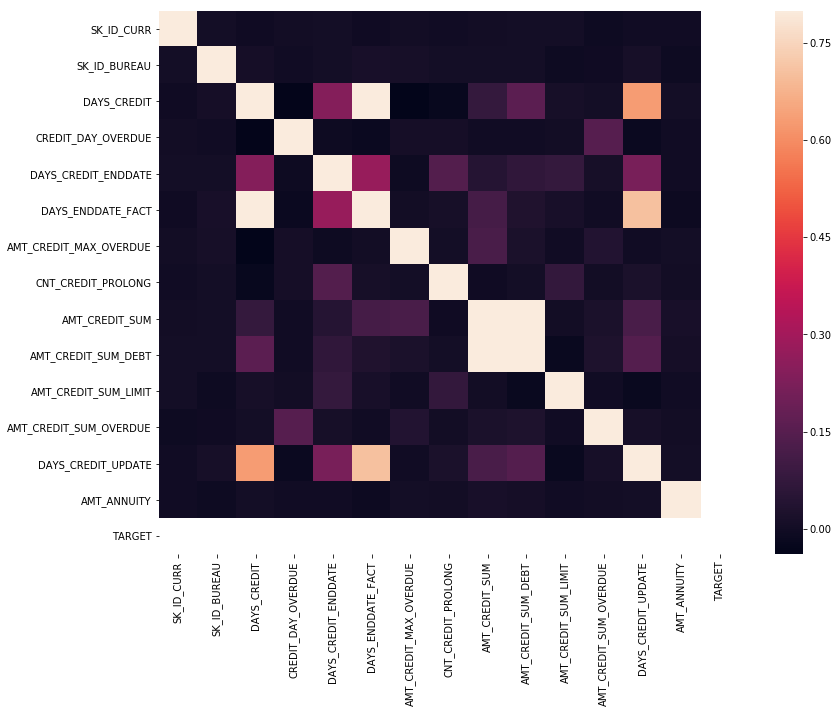

In [70]:
plt.figure(figsize=(13,10))
it=bureau[bureau['TARGET']==1]
train_corr=it.corr()
sns.heatmap(train_corr, vmax=0.8)
price_corr_values=train_corr['TARGET'].sort_values(ascending=False)
print(abs(price_corr_values).sort_values(ascending=False).head(20))

In [ ]:
plt.figure(figsize=(13,10))
train_corr=train.corr()
sns.heatmap(train_corr, vmax=0.8)
price_corr_values=train_corr['TARGET'].sort_values(ascending=False)
print(abs(price_corr_values).sort_values(ascending=False).head(20))

In [ ]:
#Days Birth

In [ ]:
train_bday=train['DAYS_BIRTH']/365
plt.hist(train_bday, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
plt.hist(train_bday[train['TARGET']==0], edgecolor = 'k', bins = 25)
plt.hist(train_bday[train['TARGET']==1], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_bday[train['TARGET']==0], label = 'target == 0')
sns.kdeplot(train_bday[train['TARGET']==1], label = 'target == 1')
plt.title('Age')

plt.figure(figsize = (8, 6))
train_ext1=train['EXT_SOURCE_1']
# KDE plot of loans that were repaid on time
sns.kdeplot(train_ext1[train['TARGET']==0], label = 'target == 0')
sns.kdeplot(train_ext1[train['TARGET']==1], label = 'target == 1')

plt.figure(figsize = (8, 6))
train_ext2=train['EXT_SOURCE_2']
# KDE plot of loans that were repaid on time
sns.kdeplot(train_ext2[train['TARGET']==0], label = 'target == 0')
sns.kdeplot(train_ext2[train['TARGET']==1], label = 'target == 1')

plt.figure(figsize = (8, 6))
train_ext3=train['EXT_SOURCE_3']
# KDE plot of loans that were repaid on time
sns.kdeplot(train_ext3[train['TARGET']==0], label = 'target == 0')
sns.kdeplot(train_ext3[train['TARGET']==1], label = 'target == 1')

In [ ]:
plt.figure(figsize=(13,10))
train_corr=train_p.corr()
sns.heatmap(train_corr, vmax=0.8)
price_corr_values=train_corr['TARGET'].sort_values(ascending=False)
print(abs(price_corr_values).sort_values(ascending=False).head(20))

In [9]:
# Make a new dataframe for polynomial features
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [11]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [12]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_3^3                -0.005448
EXT_SOURCE_3^2                -0.004932
EXT_SOURCE_3                  -0.004023
EXT_SOURCE_1 EXT_SOURCE_3^2   -0.003921
EXT_SOURCE_3 DAYS_BIRTH^2     -0.003050
EXT_SOURCE_1 EXT_SOURCE_3     -0.002701
EXT_SOURCE_2 EXT_SOURCE_3^2   -0.002487
DAYS_BIRTH^2                  -0.001403
EXT_SOURCE_2 EXT_SOURCE_3     -0.001345
EXT_SOURCE_1^2 EXT_SOURCE_3   -0.001202
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.002667
EXT_SOURCE_3 DAYS_BIRTH                 0.003814
EXT_SOURCE_3^2 DAYS_BIRTH               0.004843
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [4]:
#Converting to polynomial

polytrain = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','TARGET']]
polytest = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]



from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
polytarget=polytrain['TARGET']
polytrain = polytrain.drop(columns = ['TARGET'])

polytrain = imputer.fit_transform(polytrain)
polytest = imputer.transform(polytest)

from sklearn.preprocessing import PolynomialFeatures
polytrans = PolynomialFeatures(degree = 3)



/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
# Train the polynomial features
polytrans.fit(polytrain)
# Transform the features
polytrain = polytrans.transform(polytrain)
polytest = polytrans.transform(polytest)
print('Polynomial Features shape: ', polytrain.shape)

polynames=polytrans.get_feature_names(input_features = [ 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

Polynomial Features shape:  (307511, 35)


In [6]:
polytrain = pd.DataFrame(polytrain,columns = polynames)
polytrain['TARGET'] = polytarget

In [7]:
poly_corrs = polytrain.corr()['TARGET'].sort_values()

In [8]:
poly_corrs

EXT_SOURCE_3^3                           -0.005448
EXT_SOURCE_3^2                           -0.004932
EXT_SOURCE_3                             -0.004023
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.003921
EXT_SOURCE_3 DAYS_BIRTH^2                -0.003050
EXT_SOURCE_1 EXT_SOURCE_3                -0.002701
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.002487
DAYS_BIRTH^2                             -0.001403
EXT_SOURCE_2 EXT_SOURCE_3                -0.001345
EXT_SOURCE_1^2 EXT_SOURCE_3              -0.001202
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.000993
EXT_SOURCE_1 DAYS_BIRTH^2                -0.000848
EXT_SOURCE_2^2 DAYS_BIRTH                -0.000595
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.000472
EXT_SOURCE_1^2 DAYS_BIRTH                -0.000367
EXT_SOURCE_1                             -0.000116
EXT_SOURCE_2 DAYS_BIRTH^2                -0.000107
EXT_SOURCE_2 DAYS_BIRTH                  -0.000076
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.000046
EXT_SOURCE_2^3                 

## Inspecting Data

## Pre-processing Data

In [ ]:
train_num,test_num,train_cat,test_cat=divide_data(train,test)
train_num,test_num,train_cat,test_cat=add_int_to_cat(train_num,train_cat,test_num,test_cat)
train_cat,test_cat=remove_cat_nans(train_cat,test_cat)
train_cat,test_cat=convert_to_dummy(train_cat,test_cat)
train_num,test_num=remove_num_nans(train_num,test_num)
#train_num,test_num=fix_num_skew(train_num,test_num)
train_p,test_p=combine_data(train_num,test_num,train_cat,test_cat)

## Inspecting Corelation

In [ ]:
plt.figure(figsize=(13,10))
train_corr=train_p.corr()
sns.heatmap(train_corr, vmax=0.8)
price_corr_values=train_corr['TARGET'].sort_values(ascending=False)
print(abs(price_corr_values).sort_values(ascending=False).head(20))

In [ ]:
y=train_p['TARGET']
X=train_p.drop('TARGET',axis=1)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
train_errors = []
validation_errors = []
train_auc=[]
valid_auc=[]

data=X.reset_index(drop=True)
target=y.reset_index(drop=True)

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(data):
    X_train, X_val = data.iloc[train_index], data.iloc[test_index]
    y_train, y_val = target.iloc[train_index], target.iloc[test_index] 
    print("\nModel:LGBM Classifier")
    params = {}
    params['learning_rate'] = 0.005
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'
    params['metric'] = 'binary_logloss'
    params['sub_feature'] = 0.5
    params['num_leaves'] = 10
    params['min_data'] = 50
    params['max_depth'] = 10
    model = LGBMClassifier(n_estimators=500,
                           boosting_type = 'goss', 
                           objective = 'binary', 
                           class_weight = 'balanced', 
                           learning_rate = 0.005,
                           reg_alpha = 0.1, 
                           reg_lambda = 0.1, 
                           n_jobs = -1, 
                           metric='auc',
                           random_state = 50)
    model.fit(X_train,y_train, 
              eval_metric = 'auc',
              eval_set = [(X_val, y_val), (X_train, y_train)],
              eval_names = ['valid', 'train'],  
              early_stopping_rounds = 100,
              verbose = 200)
    best_iteration = model.best_iteration_

    predictions = model.predict_proba(X_train)[:,1]
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    train_error=rmse
    train_errors.append(train_error)

    predictions = model.predict_proba(X_val)[:,1]
    mse = mean_squared_error(y_val, predictions)
    rmse = np.sqrt(mse)
    val_error = rmse
    validation_errors.append(val_error)

#print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.format(round(np.mean(train_errors),4),round(np.mean(validation_errors),4)))
#y_pred = model.predict_proba(test_p)[:,1]


In [ ]:
pred = model.predict_proba(test_p)[:,1]

In [ ]:
solution = pd.DataFrame({"SK_ID_CURR":test_p.index.values, "TARGET":pred})
solution.to_csv("lgbm.csv", index = False)